In [1]:
import pandas as pd
import numpy as np
# Load the datasets
sales_data = pd.read_csv('/content/Bakery Sales.csv')
price_data = pd.read_csv('/content/Bakery price.csv')

In [2]:
# Display the first few rows of each dataset and their basic info
sales_data_info = sales_data.info()
price_data_info = price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

In [3]:
sales_data_head = sales_data.head()
price_data_head = price_data.head()

In [4]:
sales_data_info, price_data_info, sales_data_head, price_data_head

(None,
 None,
            datetime day of week    total place  angbutter  plain bread  jam  \
 0  2019-07-11 15:35        Thur  23800.0   NaN        1.0          NaN  NaN   
 1  2019-07-11 16:10        Thur  15800.0   NaN        1.0          NaN  NaN   
 2  2019-07-12 11:49         Fri  58000.0   NaN        NaN          NaN  NaN   
 3  2019-07-13 13:19         Sat  14800.0   NaN        1.0          1.0  NaN   
 4  2019-07-13 13:22         Sat  15600.0   NaN        2.0          NaN  NaN   
 
    americano  croissant  caffe latte  ...  gateau chocolat  pandoro  \
 0        1.0        NaN          NaN  ...              NaN      NaN   
 1        NaN        NaN          NaN  ...              NaN      NaN   
 2        NaN        NaN          NaN  ...              NaN      NaN   
 3        NaN        NaN          NaN  ...              NaN      NaN   
 4        NaN        NaN          NaN  ...              NaN      NaN   
 
    cheese cake  lemon ade  orange pound  wiener  vanila latte  berry 

In [5]:
# Convert 'price' column in price_data to numeric, handling any non-numeric issues
price_data['price'] = pd.to_numeric(price_data['price'], errors='coerce')

In [6]:
# Convert 'datetime' column in sales_data to datetime format, handling any errors
sales_data['datetime'] = pd.to_datetime(sales_data['datetime'], errors='coerce')

In [7]:
# Drop rows where 'datetime' or 'total' is missing in sales_data (important for accurate analysis)
sales_data_cleaned = sales_data.dropna(subset=['datetime', 'total']).copy()

In [8]:
# Merge sales and price data on product names
# First, standardize column names for merging (lowercase and consistent spacing if needed)
price_data.columns = price_data.columns.str.lower().str.replace(" ", "_")
sales_data_cleaned.columns = sales_data_cleaned.columns.str.lower().str.replace(" ", "_")

In [9]:
# Reshape sales_data to a long format to match products with their prices
sales_data_long = sales_data_cleaned.melt(id_vars=['datetime', 'day_of_week', 'total', 'place'],
                                          var_name='product',
                                          value_name='quantity').dropna(subset=['quantity'])

In [10]:
# Merge sales data with prices
merged_data = sales_data_long.merge(price_data, how='left', left_on='product', right_on='name').drop(columns='name')


In [11]:
# Check the results after merging
merged_data.head()

,datetime,day_of_week,total,place,product,quantity,price
0,2019-07-11 15:35:00,Thur,23800.0,NaN,angbutter,1.0,4800.0
1,2019-07-11 16:10:00,Thur,15800.0,NaN,angbutter,1.0,4800.0
2,2019-07-13 13:19:00,Sat,14800.0,NaN,angbutter,1.0,4800.0
3,2019-07-13 13:22:00,Sat,15600.0,NaN,angbutter,2.0,4800.0
4,2019-07-13 14:54:00,Sat,15800.0,NaN,angbutter,1.0,4800.0


In [12]:
# Calculate revenue for each product in each transaction
merged_data['revenue'] = merged_data['quantity'] * merged_data['price']

# Display the first few rows to confirm the new 'revenue' column
merged_data.head()

,datetime,day_of_week,total,place,product,quantity,price,revenue
0,2019-07-11 15:35:00,Thur,23800.0,NaN,angbutter,1.0,4800.0,4800.0
1,2019-07-11 16:10:00,Thur,15800.0,NaN,angbutter,1.0,4800.0,4800.0
2,2019-07-13 13:19:00,Sat,14800.0,NaN,angbutter,1.0,4800.0,4800.0
3,2019-07-13 13:22:00,Sat,15600.0,NaN,angbutter,2.0,4800.0,9600.0
4,2019-07-13 14:54:00,Sat,15800.0,NaN,angbutter,1.0,4800.0,4800.0


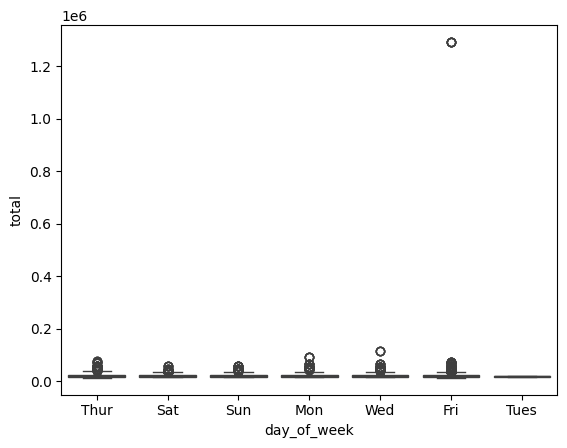

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of 'total' by 'day_of_week'
sns.boxplot(x='day_of_week', y='total', data=merged_data)
plt.show()

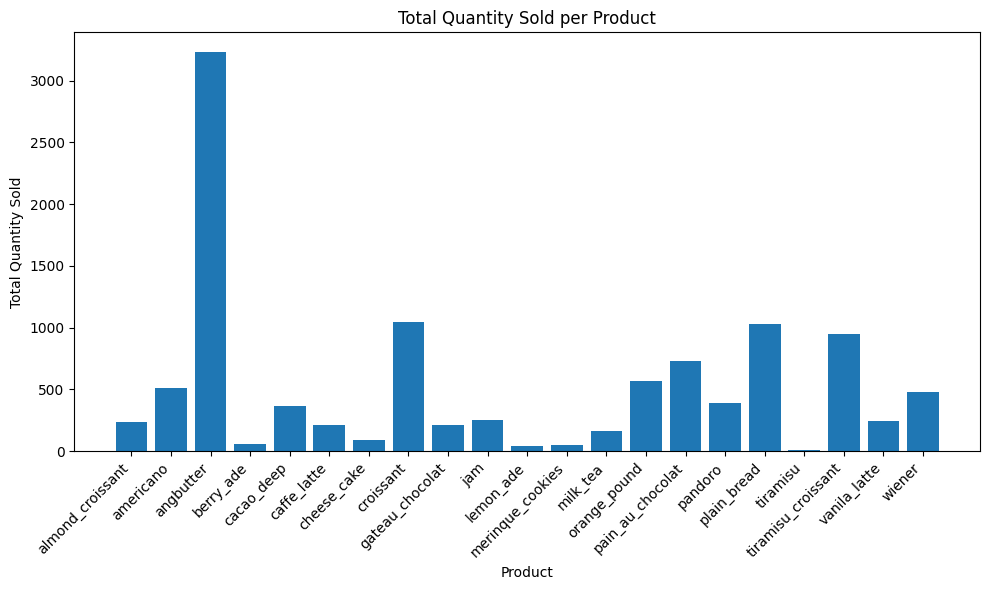

In [14]:
# Import necessary library
import matplotlib.pyplot as plt

# Group data by product and calculate the total quantity sold
product_quantity = merged_data.groupby('product')['quantity'].sum()

# Create a barplot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(product_quantity.index, product_quantity.values)
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold per Product')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [15]:
# Group by product and sum the quantity sold
product_counts = merged_data.groupby('product')['quantity'].sum()

# Create the pie chart using Altair
import altair as alt

chart = alt.Chart(product_counts.reset_index()).mark_arc().encode(
    theta='quantity',
    color='product'
)

chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

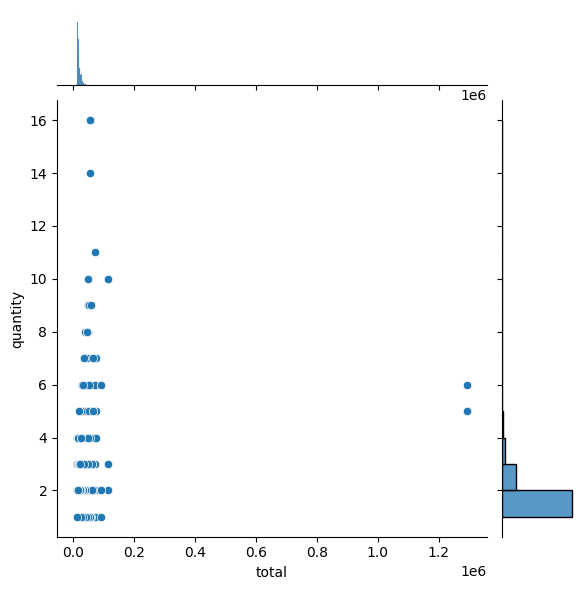

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a jointplot showing the relationship between total and quantity
sns.jointplot(x='total', y='quantity', data=merged_data, kind='scatter')
plt.show()

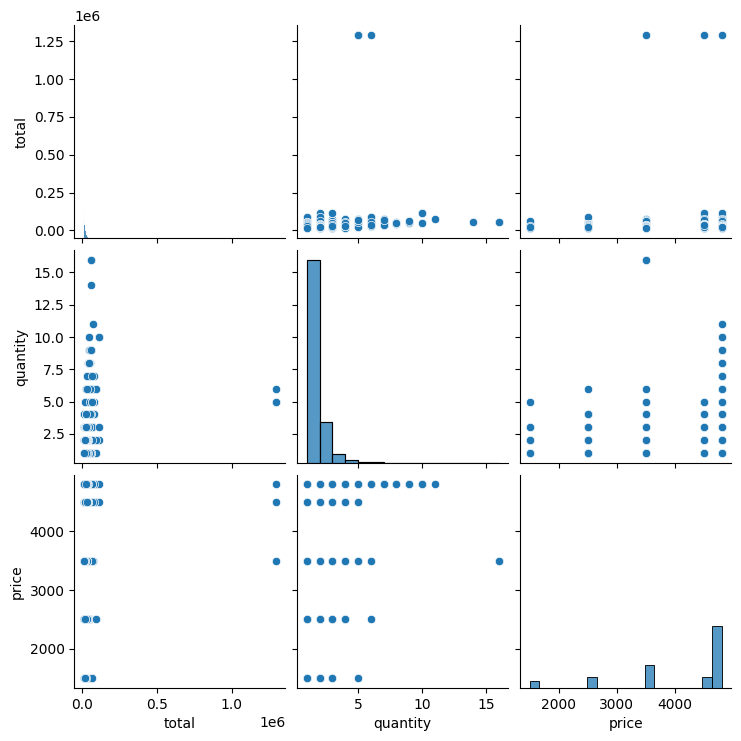

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the pair plot
numerical_cols = ['total', 'quantity', 'price']
sns.pairplot(merged_data[numerical_cols])
plt.show()

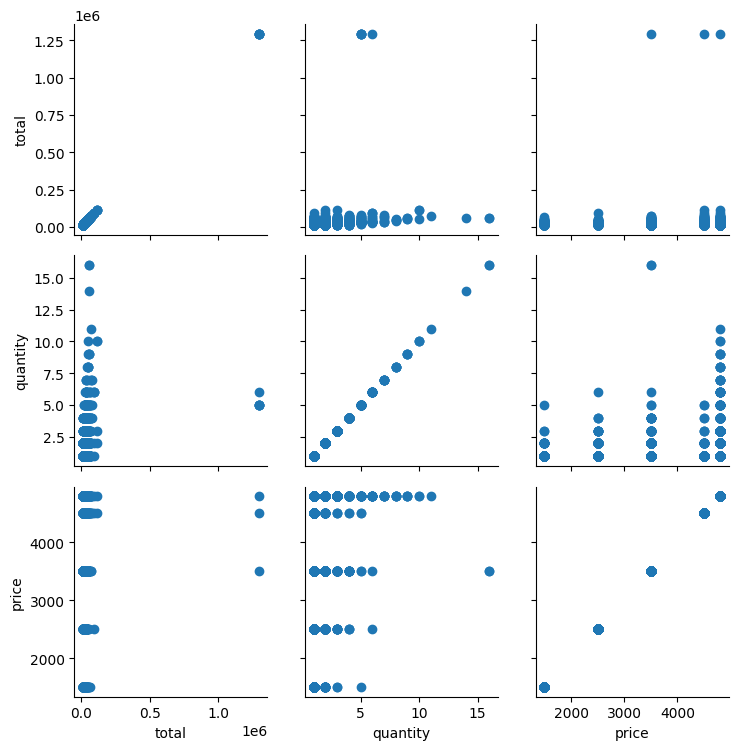

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair grid with scatter plots
g = sns.PairGrid(merged_data[['total', 'quantity', 'price']])
g.map(plt.scatter)

# Show the plot
plt.show()

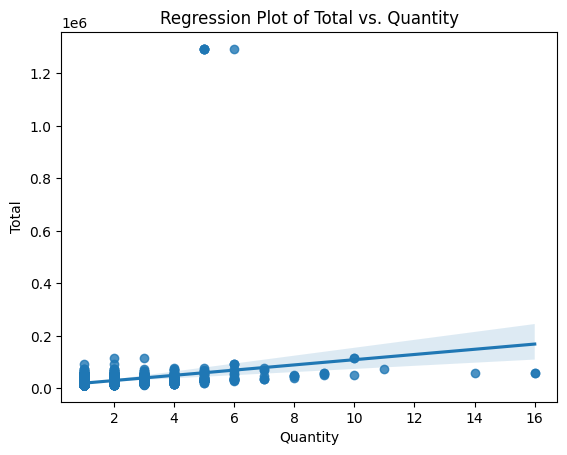

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot
sns.regplot(x='quantity', y='total', data=merged_data)

# Add labels and title
plt.xlabel('Quantity')
plt.ylabel('Total')
plt.title('Regression Plot of Total vs. Quantity')

# Show the plot
plt.show()

<ipython-input-20-ccd2ac8e062f>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = merged_data['revenue'].resample('M').sum()


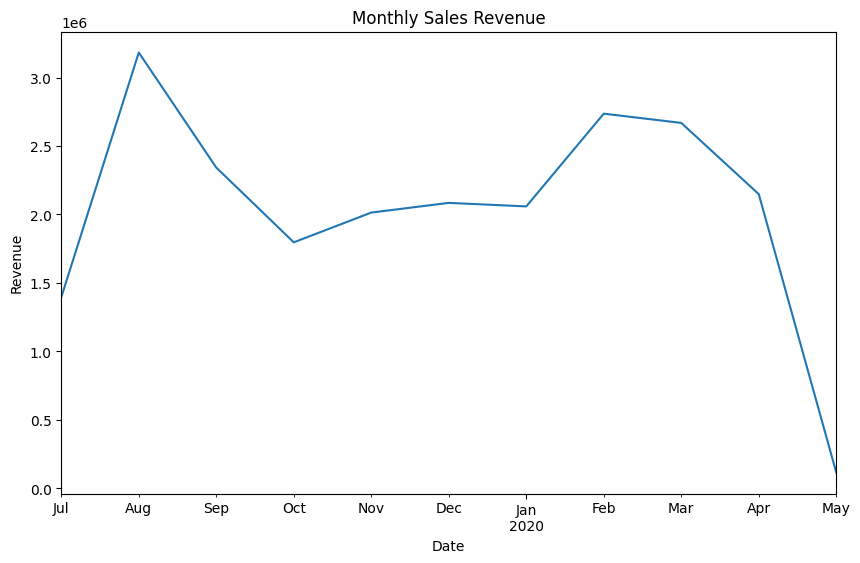

In [20]:
# Set datetime as the index for time-based analysis
merged_data.set_index('datetime', inplace=True)

# Resample data by month to observe monthly sales trends
monthly_sales = merged_data['revenue'].resample('M').sum()

# Plot monthly sales trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

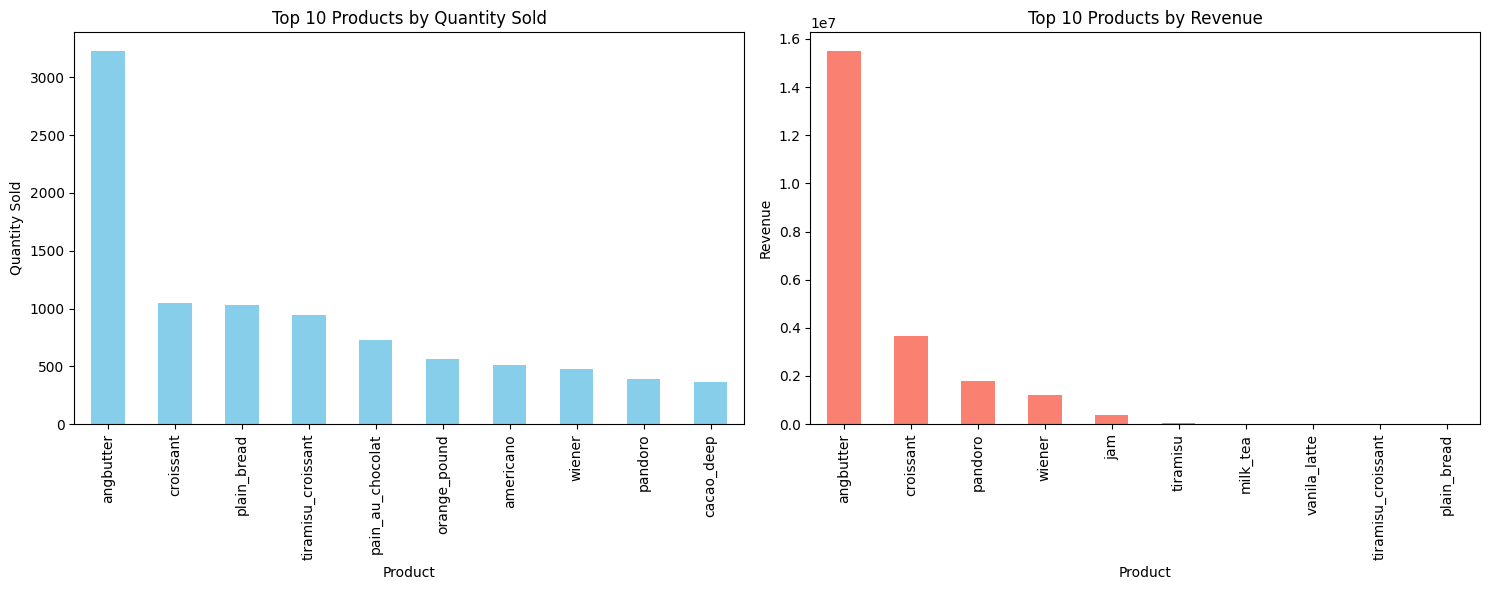

In [21]:
# Total quantity sold per product
product_sales = merged_data.groupby('product')['quantity'].sum()

# Total revenue per product
product_revenue = merged_data.groupby('product')['revenue'].sum()

# Sort and display the top 10 products by quantity and revenue
top_products_by_quantity = product_sales.sort_values(ascending=False).head(10)
top_products_by_revenue = product_revenue.sort_values(ascending=False).head(10)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
top_products_by_quantity.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Top 10 Products by Quantity Sold')
ax[0].set_xlabel('Product')
ax[0].set_ylabel('Quantity Sold')

top_products_by_revenue.plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('Top 10 Products by Revenue')
ax[1].set_xlabel('Product')
ax[1].set_ylabel('Revenue')

plt.tight_layout()
plt.show()

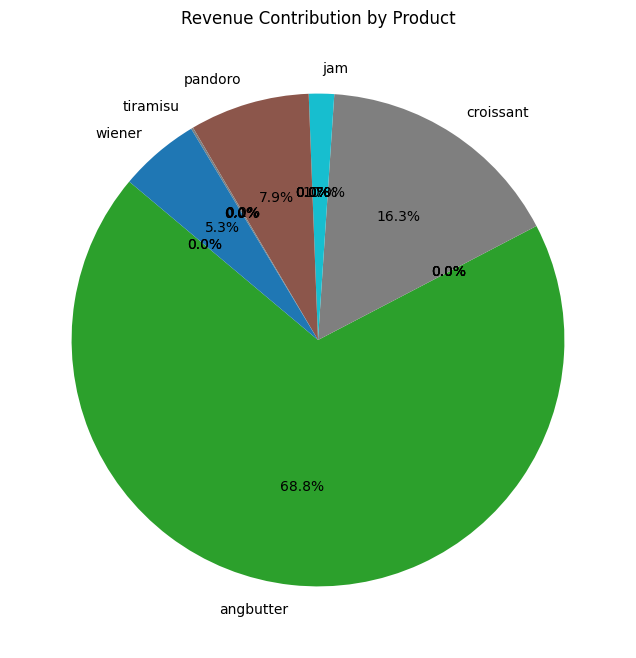

In [22]:
# Calculate revenue contribution
product_revenue_contrib = product_revenue / product_revenue.sum() * 100

# Plot as a pie chart
plt.figure(figsize=(10, 8))
product_revenue_contrib.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Revenue Contribution by Product')
plt.ylabel('')
plt.show()

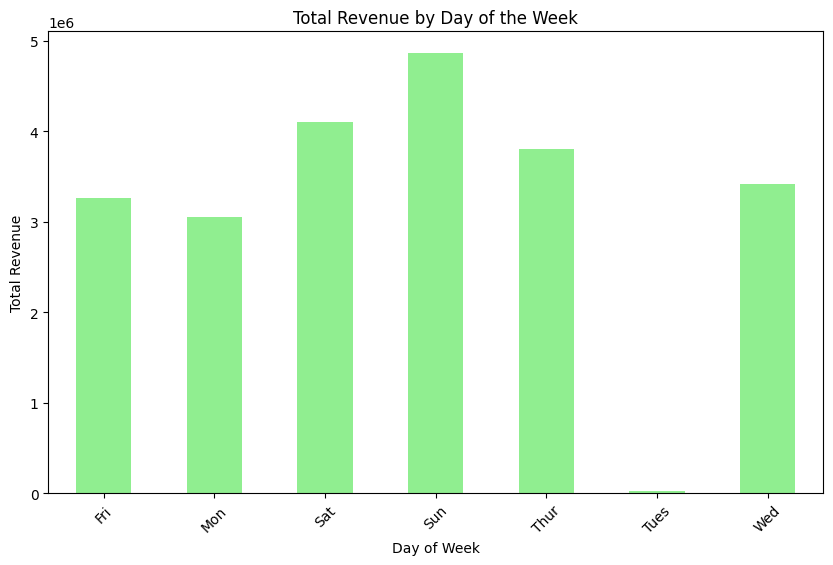

In [23]:
# Total revenue by day of the week
day_of_week_sales = merged_data.groupby('day_of_week')['revenue'].sum()

# Plotting
plt.figure(figsize=(10, 6))
day_of_week_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

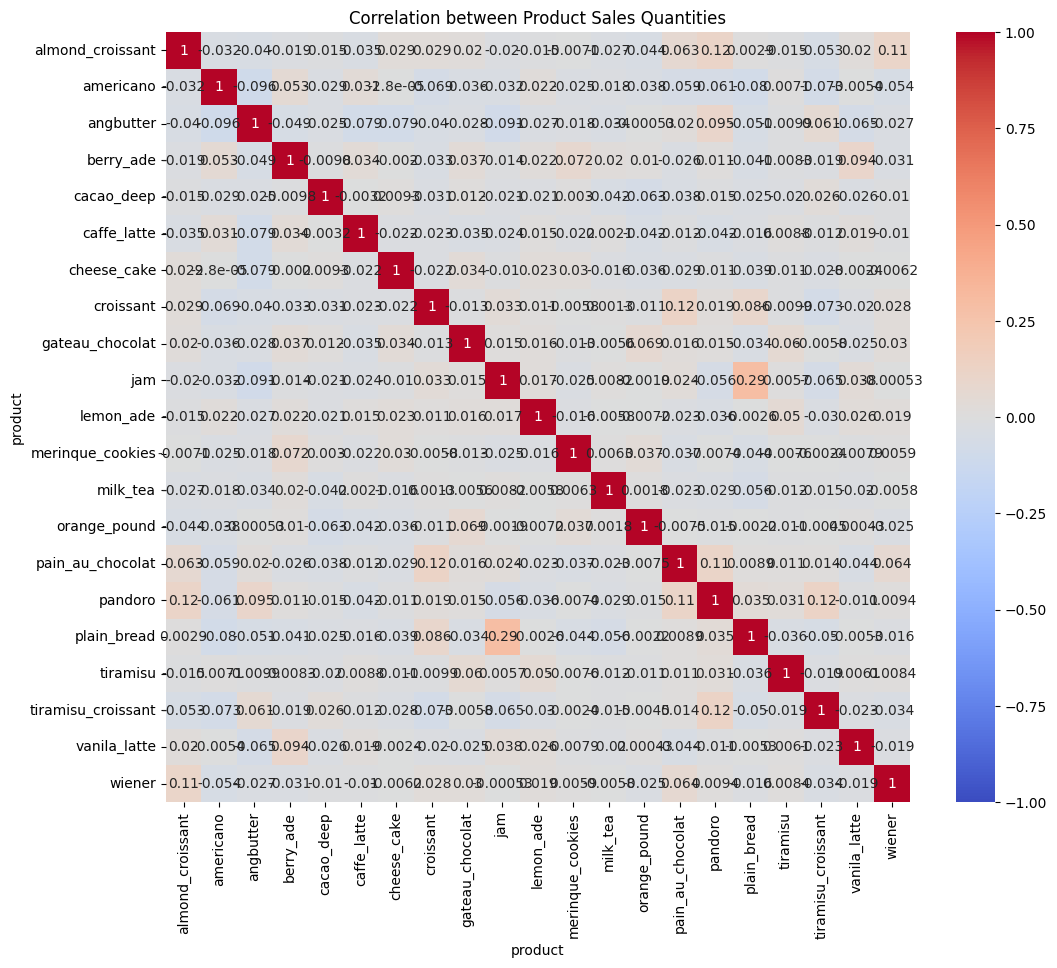

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation between product quantities
# Select only product columns for correlation calculation
product_data = merged_data.pivot_table(index='datetime', columns='product', values='quantity', aggfunc='sum').fillna(0)
product_corr = product_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(product_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Product Sales Quantities')
plt.show()

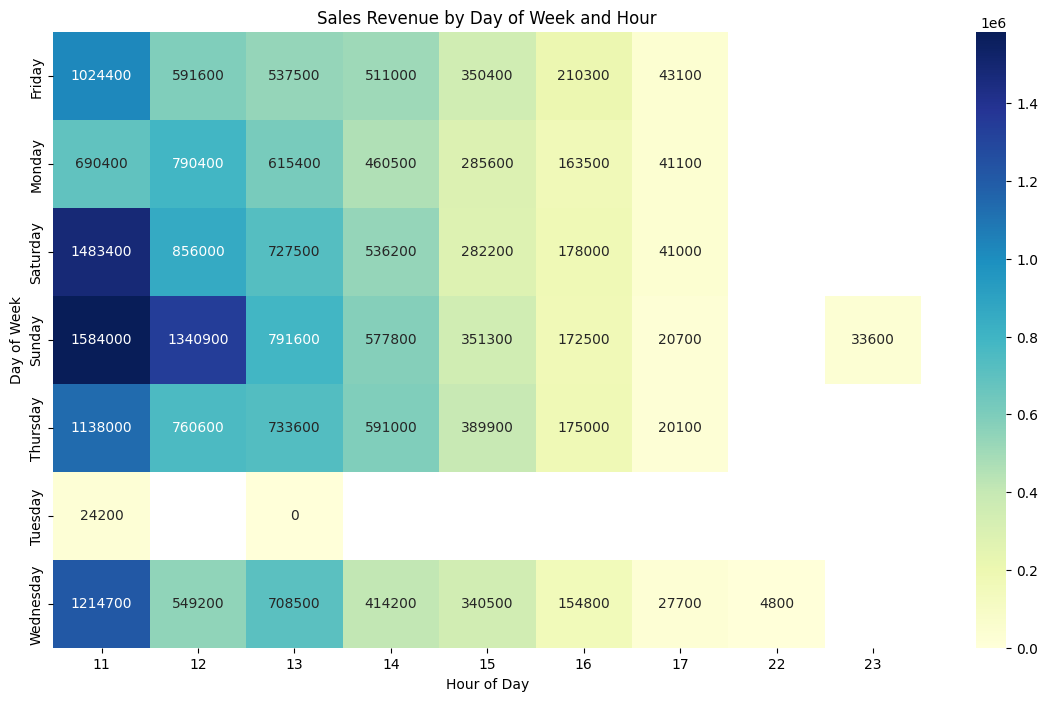

In [25]:
# Create new columns for day of the week and hour
merged_data['hour'] = merged_data.index.hour
merged_data['day_of_week'] = merged_data.index.day_name()

# Pivot table to calculate total revenue for each day of the week and hour
sales_heatmap = merged_data.pivot_table(index='day_of_week', columns='hour', values='revenue', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(sales_heatmap, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Sales Revenue by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [27]:
# Resample data to daily level
daily_data = merged_data.resample('D').sum()

# Feature Engineering
daily_data['day_of_week'] = daily_data.index.dayofweek  # Numerical day of the week
daily_data['prev_day_sales'] = daily_data['revenue'].shift(1)  # Previous day's sales
daily_data['rolling_mean_7'] = daily_data['revenue'].rolling(window=7).mean()  # Weekly rolling average
daily_data.dropna(inplace=True)  # Drop NA values from shifting

# Define features and target
X = daily_data[['day_of_week', 'prev_day_sales', 'rolling_mean_7']]
y = daily_data['revenue']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

In [30]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 24398.06779661017
Root Mean Squared Error: 31190.135034296134


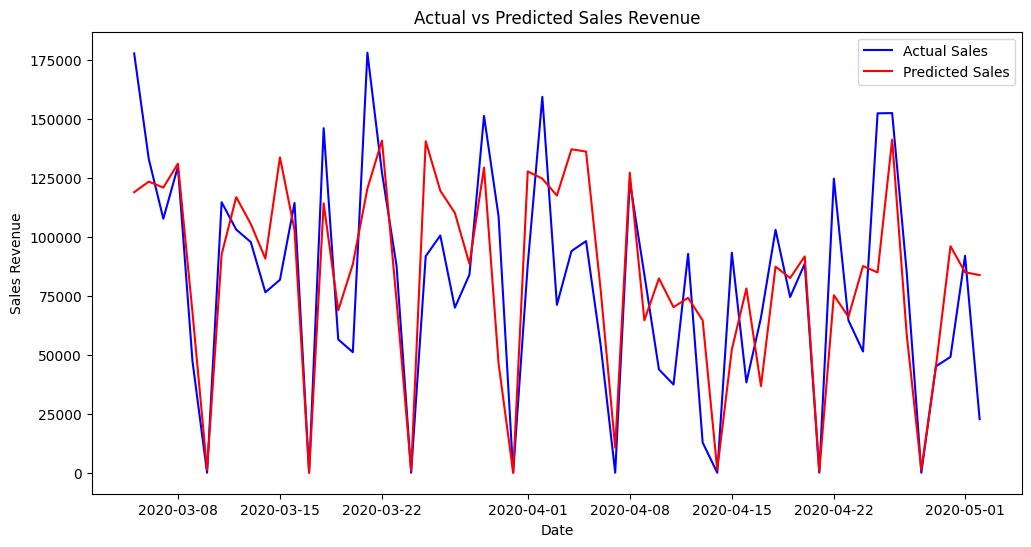

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales Revenue')
plt.title('Actual vs Predicted Sales Revenue')
plt.legend()
plt.show()

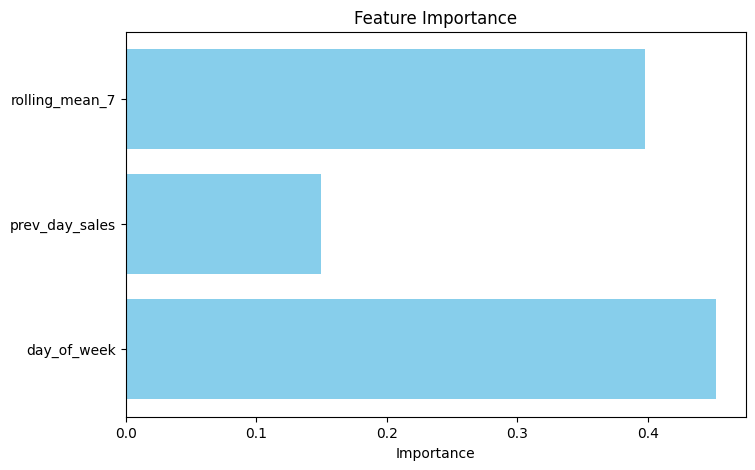

In [32]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()